# Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import random as rd
import os
from IPython.display import clear_output
from tqdm import tqdm
import tensorflow_addons as tfa

plt.style.use(['science','ieee'])

2022-05-17 15:50:22.382391: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-17 15:50:22.382419: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Intervalle parametres

In [2]:
#GeV [min,max]

M1_range = M2_range = M3_range = [50, 5000]
mA_range = [50, 5000]
tanB_range = [2, 60]
mu_range = [-10**4, 10**4]
At_range = Ab_range = Atau_range = [-10**4, 10**4]
Mq1L_range = Mq3L_range = [50, 5000]
MuR_range = MdR_range = MtR_range = MbR_range = [50, 5000]
MeL_range = MtauL_range = MeR_range = MtauR_range = [50, 5000]

PMSSM_range= [M1_range, M2_range, M3_range, mA_range, tanB_range, mu_range, At_range, Ab_range, 
              Atau_range, Mq1L_range, Mq3L_range, MuR_range, MdR_range, MtR_range, MbR_range,
             MeL_range, MtauL_range, MeR_range, MtauR_range]


def PMSSM_param_random(PMSSM_range):
    PMSSM_sample_random = []
    
    for i in PMSSM_range:
        random_value = rd.uniform(i[0],i[1])
        normalized_value = (random_value - i[0]) / (i[1] -i[0] )
        PMSSM_sample_random.append(normalized_value)
    
    return PMSSM_sample_random

# Dataset

In [3]:
taille_dataset = 100
dataset = []
taille_batch = 100
b
for i in tqdm(range(taille_dataset)):
    batch = [0 for k in range(taille_batch)]
    for j in range(len(batch)):
        batch[j] = PMSSM_param_random(PMSSM_range)
    batch = tf.convert_to_tensor(batch)
    
    dataset.append(batch)

  0%|                                                                           | 0/100 [00:00<?, ?it/s]2022-05-17 15:50:25.786739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-17 15:50:25.786798: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-17 15:50:25.786828: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MPC): /proc/driver/nvidia/version does not exist
2022-05-17 15:50:25.790152: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
100%|██████████

# Fichier slha 

In [4]:
def write_slha(PMSSM_NN, nom_slha):
    f = open(nom_slha, "w")
    
    f.write("BLOCK MODSEL \n")
    f.write(" 1    0              #MSSM \n")
    
    f.write("BLOCK SMINPUTS \n")
    f.write("  1   1.279340000e+02     # alpha^(-1) SM MSbar(M1) \n")
    f.write("  2   1.663700000e-05     # G_Fermi \n")
    f.write("  3   0.1179              # alphas(MS) SM MSbar \n")
    f.write("  4   91.1876             # MZ(pole) \n")
    f.write("  5   4.18                # mb(mb) SM MSbar \n")
    f.write("  6   172.9               # mtop(pole) \n")
    f.write("  7   1.776860000e+00     #m mtau(pole) \n")
    
    f.write("BLOCK MINPAR \n")
    f.write("  3   "+str(PMSSM_NN[4])+"   #tanb \n")
    
    f.write("BLOCK VCKMIN   #CKM param (Wolfenstein) \n")
    f.write("  1   0.22650  #lambda \n")
    f.write("  2   0.790    #A \n")
    f.write("  3   0.141    #rho \n")
    f.write("  4   0.357    #eta \n")
    
    f.write("BLOCK EXTPAR \n")
    f.write("  0   "+str(-1.0)+"               # Q \n")
    f.write("  1   "+str(PMSSM_NN[0])+"        # M1 \n")
    f.write("  2   "+str(PMSSM_NN[1])+"        # M2 \n")
    f.write("  3   "+str(PMSSM_NN[2])+"        # M3 \n")
    f.write("  11   "+str(PMSSM_NN[6])+"       # At \n")
    f.write("  12   "+str(PMSSM_NN[7])+"       # Ab \n")
    f.write("  13   "+str(PMSSM_NN[8])+"       # Atau \n")
    f.write("  23   "+str(PMSSM_NN[5])+"       # Mu \n")
    f.write("  26   "+str(PMSSM_NN[3])+"       # Ma \n")
    f.write("  31   "+str(PMSSM_NN[15])+"      # MeL \n")
    f.write("  32   "+str(PMSSM_NN[15])+"      # MmuL \n")
    f.write("  33   "+str(PMSSM_NN[16])+"      # MstauL \n")
    f.write("  34   "+str(PMSSM_NN[17])+"      # MeR \n")
    f.write("  35   "+str(PMSSM_NN[17])+"      # MmuR \n")
    f.write("  36   "+str(PMSSM_NN[18])+"      # MstauR \n")
    f.write("  41   "+str(PMSSM_NN[9])+"       # Mq1L \n")
    f.write("  42   "+str(PMSSM_NN[9])+"       # Mq2L \n")
    f.write("  43   "+str(PMSSM_NN[10])+"      # Mq3L \n")
    f.write("  44   "+str(PMSSM_NN[11])+"      # MquR \n")
    f.write("  45   "+str(PMSSM_NN[11])+"      # MqcR \n")
    f.write("  46   "+str(PMSSM_NN[13])+"      # MqtR \n")
    f.write("  47   "+str(PMSSM_NN[12])+"      # MqdR \n")
    f.write("  48   "+str(PMSSM_NN[12])+"      # MqsR \n")
    f.write("  49   "+str(PMSSM_NN[14])+"      # MqbR \n")
    
    f.close()

# Neural Network

### Loss function

In [5]:
def verification_param(PMSSM_NN):
    loss = [rd.uniform(0, 1) for i in range(len(PMSSM_NN))]
    correction = False
    
    for i in range(4):
        if PMSSM_NN[i] < 50.0 or PMSSM_NN[i] > 5000:
            loss[i] = 1.0
            correction = True
    
    if PMSSM_NN[4] < 2.0 or PMSSM_NN[4] > 60.0:
        loss[4] = 1.0
        correction = True
    
    for i in range(4):
        if PMSSM_NN[i+5] < -10**4 or PMSSM_NN[i+5] > 10**4:
            loss[i+5] = 1.0
            correction = True
        
    for i in range(10):
        if PMSSM_NN[i+9] < 0.0 or PMSSM_NN[i+9] > 5000:
            loss[i+9] = 1.0
            correction = True
    
    loss = tf.convert_to_tensor(loss)
    return loss , correction

In [6]:
def denormalization(logits):
    PMSSM_NN = []
    
    compteur = 0
    for i in logits:
        m = i * (PMSSM_range[compteur][1]-PMSSM_range[compteur][0]) + PMSSM_range[compteur][0]
        compteur+=1
        PMSSM_NN.append(m)
        
    return PMSSM_NN

In [7]:
def loss_function(logits, PMSSM_range, ratio, succes_path):
    logits_tensor = logits
    logits = logits.numpy()
    
    PMSSM_NN = denormalization(logits)
    
    loss , correction = verification_param(PMSSM_NN)
    if correction == True:
        squared_difference = tf.square(logits_tensor - loss)
        ratio[0]+=1
        return tf.reduce_mean(squared_difference, axis=-1)
                   
                
    write_slha(PMSSM_NN, "Jupyter Notebook/pmssm_nn.in")    
    
    os.system('./SUSY/softsusy-4.1.9/softpoint.x leshouches < Jupyter\ Notebook/pmssm_nn.in > Jupyter\ Notebook/pmssm_nn.out')
    
    erreur = False
    with open('Jupyter Notebook/pmssm_nn.out') as slha_out:
        content = slha_out.read()
        if 'SOFTSUSY problem' in content:
            erreur = True
        if 'LSP # Warning' in content:
            erreur = True

    
    if erreur == True:
        loss = [1.0 for i in range(len(logits))]
        loss = tf.convert_to_tensor(loss)
        squared_difference = tf.square(logits_tensor - loss)
        ratio[0]+=1
        return tf.reduce_mean(squared_difference, axis=-1)
    
    
    if erreur == False:
        ratio[1]+=1
        commande = 'mv Jupyter\ Notebook/pmssm_nn.out '
        nom_fichier = 'pmssm_nn_succes_'+str(ratio[1])+'.out'
        os.system(commande+succes_path+nom_fichier)
        loss = [rd.uniform(0, 1) for i in range(len(logits))]
        loss = tf.convert_to_tensor(loss)
        squared_difference = tf.square(logits_tensor - loss)
        return tf.reduce_mean(squared_difference, axis=-1)
        

In [8]:
fnc_activation = 'relu'
fnc_activation_output = 'linear'
inputs = tf.keras.Input(shape=(19,), dtype='float32')
x = keras.layers.Dense(19*2, trainable=True, activation=fnc_activation)(inputs)
x = keras.layers.Dense(19*4, trainable=True, activation=fnc_activation)(x)
x = keras.layers.Dense(19*2, trainable=True, activation=fnc_activation)(x)
outputs = keras.layers.Dense(19, activation=fnc_activation_output)(x)
model = tf.keras.Model(inputs,outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
#optimizer = tfa.optimizers.SWA(optimizer, start_averaging=100, average_period=100)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 38)                760       
                                                                 
 dense_1 (Dense)             (None, 76)                2964      
                                                                 
 dense_2 (Dense)             (None, 38)                2926      
                                                                 
 dense_3 (Dense)             (None, 19)                741       
                                                                 
Total params: 7,391
Trainable params: 7,391
Non-trainable params: 0
_________________________________________________________________


In [9]:
loss_evolution = []
efficacite = []
ratio = [0,0]
os.chdir('/home/mathis/Stage M1/')
os.system('rm -r Jupyter\ Notebook/softsusy_succes/')
os.system('mkdir -p Jupyter\ Notebook/softsusy_succes')
succes_path = 'Jupyter\ Notebook/softsusy_succes/'


epoch = 50
for k in range(epoch):
    print('Epochs {} / {}'.format(k+1,epoch))
    sum_loss = 0
    for i in tqdm(dataset):
        with tf.GradientTape() as tape:
            logits = model(i)
            loss = loss_function(logits[0], PMSSM_range, ratio, succes_path)  
            gradients = tape.gradient(loss, model.trainable_weights)
            
            sum_loss+=loss
    
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    loss_evolution.append(sum_loss/len(dataset))
    efficacite.append(ratio[1]/(ratio[0]+ratio[1]))
    
    print('Loss:',sum_loss.numpy()/len(dataset))
    print('Efficacité:',ratio[1]/(ratio[0]+ratio[1]))
    print('\n')
    
print("Nombre d'échecs:",ratio[0])
print("Nombre de succes:",ratio[1])

Epochs 1 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.88it/s]


Loss: 0.2418963623046875
Efficacité: 0.18


Epochs 2 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.54it/s]


Loss: 0.11772269248962403
Efficacité: 0.145


Epochs 3 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.07it/s]


Loss: 0.10921289443969727
Efficacité: 0.11666666666666667


Epochs 4 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.63it/s]


Loss: 0.12502102851867675
Efficacité: 0.2325


Epochs 5 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.51it/s]


Loss: 0.1166648006439209
Efficacité: 0.32


Epochs 6 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.74it/s]


Loss: 0.09987504959106445
Efficacité: 0.42333333333333334


Epochs 7 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.52it/s]


Loss: 0.09505199432373047
Efficacité: 0.4742857142857143


Epochs 8 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.14it/s]


Loss: 0.10315810203552246
Efficacité: 0.43125


Epochs 9 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.64it/s]


Loss: 0.09880559921264648
Efficacité: 0.41555555555555557


Epochs 10 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.93it/s]


Loss: 0.09292418479919434
Efficacité: 0.47


Epochs 11 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.70it/s]


Loss: 0.09690431594848632
Efficacité: 0.5136363636363637


Epochs 12 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.46it/s]


Loss: 0.10807941436767578
Efficacité: 0.5241666666666667


Epochs 13 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.86it/s]


Loss: 0.09887638092041015
Efficacité: 0.556923076923077


Epochs 14 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.90it/s]


Loss: 0.08994903564453124
Efficacité: 0.5878571428571429


Epochs 15 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.86it/s]


Loss: 0.09218839645385742
Efficacité: 0.614


Epochs 16 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.81it/s]


Loss: 0.08566577911376953
Efficacité: 0.6375


Epochs 17 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.97it/s]


Loss: 0.08965531349182129
Efficacité: 0.658235294117647


Epochs 18 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.55it/s]


Loss: 0.0884683895111084
Efficacité: 0.6766666666666666


Epochs 19 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.96it/s]


Loss: 0.0851751708984375
Efficacité: 0.6931578947368421


Epochs 20 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.39it/s]


Loss: 0.12024291038513184
Efficacité: 0.6765


Epochs 21 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.88it/s]


Loss: 0.11770383834838867
Efficacité: 0.6666666666666666


Epochs 22 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.37it/s]


Loss: 0.08576868057250976
Efficacité: 0.6813636363636364


Epochs 23 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.79it/s]


Loss: 0.09232749938964843
Efficacité: 0.6882608695652174


Epochs 24 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.38it/s]


Loss: 0.10188011169433593
Efficacité: 0.66


Epochs 25 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.36it/s]


Loss: 0.09190459251403808
Efficacité: 0.6628


Epochs 26 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.00it/s]


Loss: 0.08522943496704101
Efficacité: 0.6753846153846154


Epochs 27 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.85it/s]


Loss: 0.08346036911010742
Efficacité: 0.6874074074074074


Epochs 28 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.30it/s]


Loss: 0.08835643768310547
Efficacité: 0.6978571428571428


Epochs 29 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.73it/s]


Loss: 0.0971733283996582
Efficacité: 0.6975862068965517


Epochs 30 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.47it/s]


Loss: 0.09822085380554199
Efficacité: 0.6786666666666666


Epochs 31 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.91it/s]


Loss: 0.10415825843811036
Efficacité: 0.6583870967741936


Epochs 32 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.01it/s]


Loss: 0.09153874397277832
Efficacité: 0.66875


Epochs 33 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.79it/s]


Loss: 0.08606060028076172
Efficacité: 0.6784848484848485


Epochs 34 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.88it/s]


Loss: 0.08458616256713868
Efficacité: 0.6879411764705883


Epochs 35 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.03it/s]


Loss: 0.08808189392089844
Efficacité: 0.6968571428571428


Epochs 36 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.98it/s]


Loss: 0.09126306533813476
Efficacité: 0.7052777777777778


Epochs 37 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.85it/s]


Loss: 0.08483920097351075
Efficacité: 0.7132432432432433


Epochs 38 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.88it/s]


Loss: 0.08466815948486328
Efficacité: 0.7207894736842105


Epochs 39 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.86it/s]


Loss: 0.08613669395446777
Efficacité: 0.727948717948718


Epochs 40 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.89it/s]


Loss: 0.08543795585632324
Efficacité: 0.73475


Epochs 41 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.95it/s]


Loss: 0.08692849159240723
Efficacité: 0.7412195121951219


Epochs 42 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.99it/s]


Loss: 0.0902528190612793
Efficacité: 0.746904761904762


Epochs 43 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.77it/s]


Loss: 0.08686379432678222
Efficacité: 0.7527906976744186


Epochs 44 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.97it/s]


Loss: 0.08481095314025879
Efficacité: 0.7584090909090909


Epochs 45 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.01it/s]


Loss: 0.08787325859069824
Efficacité: 0.7637777777777778


Epochs 46 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.18it/s]


Loss: 0.08679846763610839
Efficacité: 0.768695652173913


Epochs 47 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.88it/s]


Loss: 0.08189420700073242
Efficacité: 0.7736170212765957


Epochs 48 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.78it/s]


Loss: 0.08453716278076172
Efficacité: 0.7783333333333333


Epochs 49 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.83it/s]


Loss: 0.08374296188354492
Efficacité: 0.7828571428571428


Epochs 50 / 50


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.32it/s]

Loss: 0.0863108730316162
Efficacité: 0.787


Nombre d'échecs: 1065
Nombre de succes: 3935


# Plots

## Récupération données 


In [10]:
def recuperation_slha(folder,filename,sus_mass,param,succes):
    warning = 0
    for j in range(succes):
        file_name =folder+filename+str(j+1)+'.out' 
        
        with open(file_name) as file:
            for indice, ligne in enumerate(file):
                if 'tanb' in ligne:
                    indice_tanb = indice
                
                if 'M_1(MX)' in ligne:
                    indices_M = [indice+i for i in range(3)]
                if 'At(MX)' in ligne:
                    indices_A = [indice+i for i in range(3)]
                if 'mu(MX)' in ligne:
                    indice_mu = indice
                if 'mA(pole)' in ligne:
                    indice_mA = indice
                if 'meL(MX)' in ligne:
                    indices_mlL = [indice+i for i in range(3)]
                if 'meR(MX)' in ligne:
                    indices_mlR = [indice+i for i in range(3)]
                if 'mqL1(MX)' in ligne:
                    indices_qL = [indice+i for i in range(3)]
                if 'muR(MX)' in ligne:
                    indices_q = [indice+i for i in range(6)]
                    
                if 'h0' in ligne:
                    indices_higgs = [indice+i for i in range(2)]
                if '~g' in ligne:
                    indice_g = indice
                if '~neutralino(1)' in ligne:
                    indices_neutralino = [indice,indice+1,indice+3,indice+4]
                if '~d_L' in ligne:
                    indices_squarkL = [indice+i for i in range(6)]
                if '~d_R' in ligne:
                    indices_squarkR = [indice+i for i in range(6)]
                if '~chargino(1)' in ligne:
                    indices_chargino = [indice,indice+3]
        
        
        file = open(file_name)
        lignes = file.readlines()
        
        for step, i in enumerate(param[0]):
            i.append(float(lignes[indices_M[step]].split()[1]))

        for step, i in enumerate(param[1]):
            i.append(float(lignes[indices_A[step]].split()[1]))  
            
        param[2].append(float(lignes[indice_mu].split()[1]))
        
        param[3].append(float(lignes[indice_mA].split()[1]))
        
        for step, i in enumerate(param[4]):
            i.append(float(lignes[indices_mlL[step]].split()[1]))
            
        for step, i in enumerate(param[5]):
            i.append(float(lignes[indices_mlR[step]].split()[1]))
            
        for step, i in enumerate(param[6]):
            i.append(float(lignes[indices_qL[step]].split()[1]))
        
        for step, i in enumerate(param[7]):
            i.append(float(lignes[indices_q[step]].split()[1]))
            
        param[8].append(float(lignes[indice_tanb].split()[1]))
            
        
        sus_mass[0].append(float(lignes[indice_g].split()[1]))
        
        for step, i in enumerate(sus_mass[1]):
            i.append(float(lignes[indices_neutralino[step]].split()[1]))
            
        for step, i in enumerate(sus_mass[2]):
            i.append(float(lignes[indices_squarkL[step]].split()[1]))

        for step, i in enumerate(sus_mass[3]):
            i.append(float(lignes[indices_squarkR[step]].split()[1]))
        
        for step, i in enumerate(sus_mass[4]):
            i.append(float(lignes[indices_higgs[step]].split()[1]))

        for step, i in enumerate(sus_mass[5]):
            i.append(float(lignes[indices_chargino[step]].split()[1]))        
    
    
        with open(file_name) as file:
            if 'LSP # Warning' in file.read():
                warning+=1
    return warning

In [11]:
g_mass = []
neutralino_mass = [[] for i in range(4)]   #[N1 , N2 , N3 , N4]
squarkL_mass = [[] for i in range(6)]      #[d , u , s , c , b , t]
squarkR_mass = [[] for i in range(6)]       
higgs_mass = [[] for i in range(2)]        #[h0 , H0]
chargino_mass = [[] for i in range(2)]     #[neutralino1 , neutralino2]

M_param = [[] for i in range(3)]           #[M1 , M2 , M3]
A_param = [[] for i in range(3)]           #[At , Ab , Atau]
mu = []
mA_param = []
mlL_param = [[] for i in range(3)]         #[meL , mmuL , mtauL]
mlR_param = [[] for i in range(3)]         #[meR , mmuR , mtauR]
mqL_param = [[] for i in range(3)]         #[mqL1 , mqL2 , mqL3]
quark_param = [[] for i in range(6)]       #[u , c , t , d , s , b]
tanB = []

sus_mass = [g_mass,neutralino_mass,squarkL_mass,squarkR_mass,higgs_mass,chargino_mass]
param = [M_param,A_param,mu,mA_param,mlL_param,mlR_param,mqL_param,quark_param,tanB]

folder = 'Jupyter Notebook/softsusy_succes/'
file_name = 'pmssm_nn_succes_'
warning = recuperation_slha(folder,file_name,sus_mass,param,ratio[1])

print('Nombre warning:',warning)

Nombre warning: 0


In [12]:
from datetime import date, datetime

folder_name = str(date.today())+'-'+str(datetime.now().time().strftime("%H:%M:%S"))
commande = 'mkdir -p Jupyter\ Notebook/Test/'+folder_name
os.system(commande)

with open('Jupyter Notebook/Test/'+folder_name+'/config.txt', 'w') as f:
    f.write('taile dataset: '+str(taille_dataset)+'\n')
    f.write('taile batch: '+str(taille_batch)+'\n')
    f.write('nombre epochs: '+str(epoch)+'\n')
    f.write("Nombre d'échecs: "+str(ratio[0])+'\n')
    f.write("Nombre de succes: "+str(ratio[1])+'\n')
    f.write("Nombre Warning LSP: "+str(warning)+'\n')
    f.write('\n')
    f.write("Fonctions d'activations: "+fnc_activation+'\n')
    f.write("Fonctions d'activations output: "+fnc_activation_output+'\n')
    f.write('Optimizer: '+str(optimizer)+'\n')
    f.write('\n')
    model.summary(print_fn=lambda x: f.write(x + '\n'))

    
param_file = zip(M_param[0],M_param[1],M_param[2],A_param[0],A_param[1],A_param[2],mu,mA_param,
                 mlL_param[0],mlL_param[1],mlL_param[2],mlR_param[0],mlR_param[2],mlR_param[2],
                 mqL_param[0],mqL_param[1],mqL_param[2],quark_param[0],quark_param[1],quark_param[2],
                 quark_param[3],quark_param[4],quark_param[5],tanB)

header = ['M1', 'M2', 'M3', 'At', 'Ab', 'Atau', 'mu', 'mA', 'meL', 'mmuL', 'mtauL', 'meR', 'mmuR', 'mtauR', 'mqL1', 'mqL2', 'mqL3', 'muR', 'mcR', 'mtR', 'mdR', 'msR', 'mbR', 'tanb']

import csv
with open('Jupyter Notebook/Test/'+folder_name+'/data.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerow(header)
    writer.writerows(param_file)

## Loss

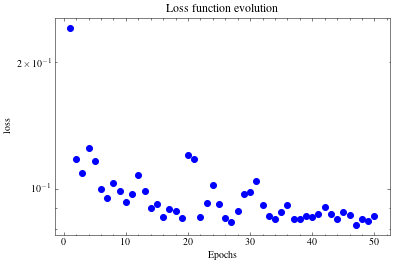

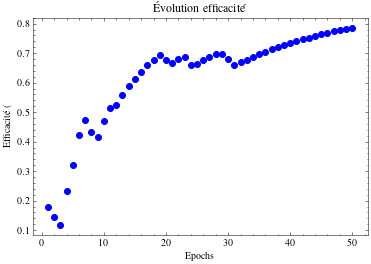

In [13]:
time_epoch = [i+1 for i in range(epoch)]

plt.figure()
plt.title('Loss function evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(time_epoch, loss_evolution, 'ob',label='loss')
plt.yscale('log')
plt.savefig('Jupyter Notebook/Test/'+folder_name+'/loss.svg')

plt.figure()
plt.title('Évolution efficacité')
plt.xlabel('Epochs')
plt.ylabel('Efficacité (%)')
plt.plot(time_epoch, efficacite, 'ob',label='efficacité')
plt.savefig('Jupyter Notebook/Test/'+folder_name+'/efficacite.svg')

## Plot mass 

In [14]:
def plot_histo(title, xlabel, ylabel, list_hist,bins, label, legend = False, histtype='bar', save=False, file_folder=''):
    plt.figure()
    for indice, hist in enumerate(list_hist):
        plt.hist(hist,bins,label=label[indice],histtype=histtype)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend == True:
        plt.legend()
    if save == True:
        plt.savefig(file_folder)
    
def subplot_histo(titre, xlabel, ylabel, x, y, share, subtitle, hist_list, label, legend = False, histtype='bar', save=False, file_folder=''):  
    fig , ax = plt.subplots(x, y, sharex=share[0], sharey=share[1], constrained_layout = True)
    plt.suptitle(titre)
    fig.text(0.5, -0.05, xlabel, ha='center')
    fig.text(-0.04, 0.5, ylabel, va='center', rotation='vertical')

    for indice, hist in enumerate(hist_list): 
        compteur = 0
        for i in range(x):
            if y != 1:
                for j in range(y):
                    ax[i, j].hist(hist[compteur],100,histtype=histtype,label=label[indice])
                    ax[i, j].set_title(subtitle[compteur])
                    compteur+=1
                    if legend == True:
                        ax[i, j].legend()
            else:
                ax[i].hist(hist[compteur],100,histtype=histtype, label=label[indice])
                ax[i].set_title(subtitle[compteur])
                compteur+=1
                if legend == True:
                    ax[i].legend()
    if save == True:
        plt.savefig(file_folder)
        

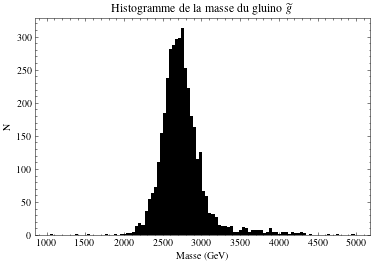

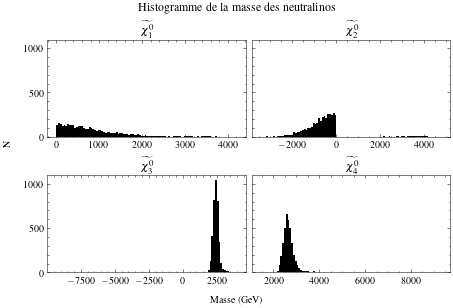

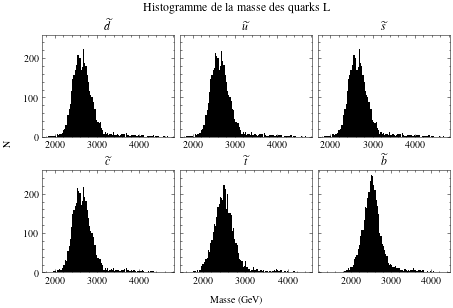

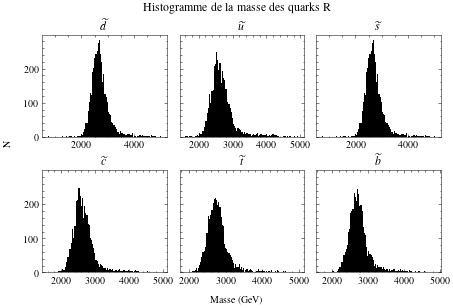

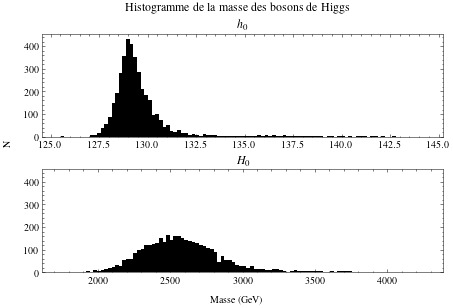

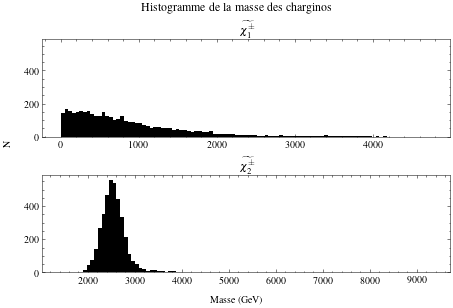

In [15]:
folder = 'Jupyter Notebook/Test/'+folder_name

file = '/histo_gluinos.svg'
titre = r'Histogramme de la masse du gluino $\widetilde{g}$'
xlabel = 'Masse (GeV)'
ylabel = 'N'
plot_histo(titre,xlabel,ylabel,[g_mass],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_neutralinos.svg'
titre = 'Histogramme de la masse des neutralinos'
subtitle = [r'$\widetilde{\chi_1^0}$',r'$\widetilde{\chi_2^0}$',r'$\widetilde{\chi_3^0}$',r'$\widetilde{\chi_4^0}$']
share = [False,True]
subplot_histo(titre,xlabel,ylabel,2,2,share,subtitle,[neutralino_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_quarksL.svg'
titre = 'Histogramme de la masse des quarks L'
subtitle = [r'$\widetilde{d}$',r'$\widetilde{u}$',r'$\widetilde{s}$',r'$\widetilde{c}$',r'$\widetilde{t}$',r'$\widetilde{b}$']    
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[squarkL_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_quarksR.svg'
titre = 'Histogramme de la masse des quarks R' 
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[squarkR_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_higgs.svg'
titre = 'Histogramme de la masse des bosons de Higgs'    
subtitle = [r'$h_0$',r'$H_0$']
subplot_histo(titre,xlabel,ylabel,2,1,share,subtitle,[higgs_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_charginos.svg'
titre = 'Histogramme de la masse des charginos'    
subtitle = [r'$\widetilde{\chi_1^\pm}$',r'$\widetilde{\chi_2^\pm}$']
subplot_histo(titre,xlabel,ylabel,2,1,share,subtitle,[chargino_mass],['NN'],save=True,file_folder=folder+file)

## Plots param 

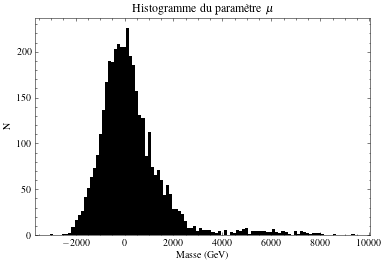

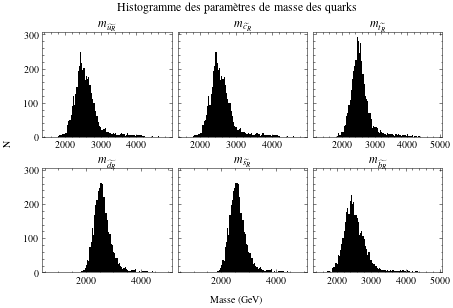

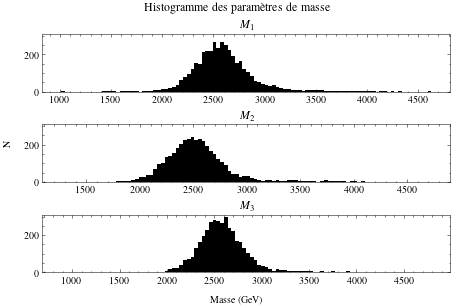

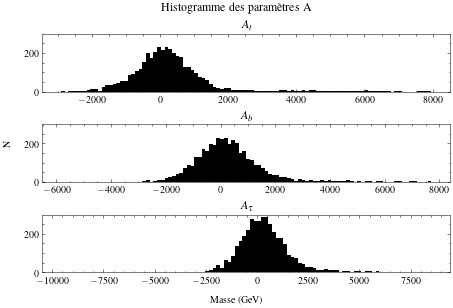

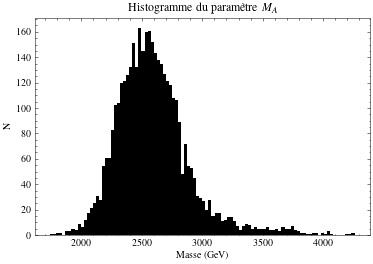

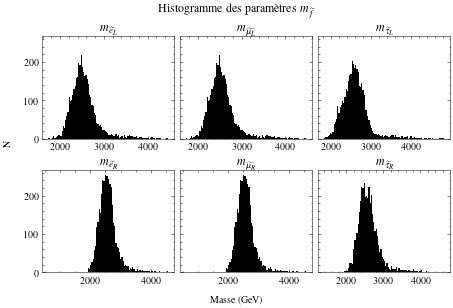

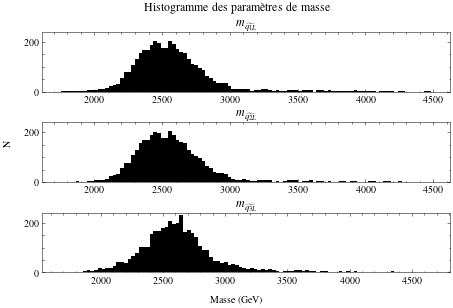

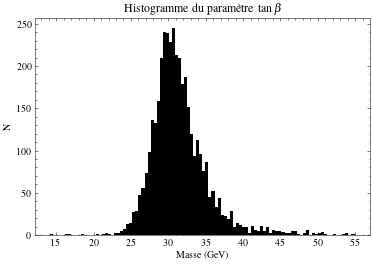

In [16]:
file = '/histo_mu.svg'
titre = r'Histogramme du paramètre $\mu$'
plot_histo(titre,xlabel,ylabel,[mu],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_mquarks.svg'
titre = 'Histogramme des paramètres de masse des quarks'
subtitle = [r'$m_{\widetilde{u_R}}$',r'$m_{\widetilde{c_R}}$',r'$m_{\widetilde{t_R}}$',r'$m_{\widetilde{d_R}}$',r'$m_{\widetilde{s_R}}$',r'$m_{\widetilde{b_R}}$']
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[quark_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_M.svg'
titre = 'Histogramme des paramètres de masse'
subtitle = [r'$M_1$',r'$M_2$',r'$M_3$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[M_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_A.svg'
titre = 'Histogramme des paramètres A'
subtitle = [r'$A_t$',r'$A_b$',r'$A_\tau$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[A_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_mA.svg'
titre = r'Histogramme du paramètre $M_A$'
plot_histo(titre,xlabel,ylabel,[mA_param],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_mlL.svg'
titre = r'Histogramme des paramètres $m_{\widetilde{f}}$'
subtitle = [r'$m_{\widetilde{e_L}}$',r'$m_{\widetilde{\mu_L}}$',r'$m_{\widetilde{\tau_L}}$',r'$m_{\widetilde{e_R}}$',r'$m_{\widetilde{\mu_R}}$',r'$m_{\widetilde{\tau_R}}$']
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[mlL_param+mlR_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_mqL.svg'
titre = 'Histogramme des paramètres de masse'
subtitle = [r'$m_{\widetilde{q_{1L}}}$',r'$m_{\widetilde{q_{2L}}}$',r'$m_{\widetilde{q_{3L}}}$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[mqL_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_tanb.svg'
titre = r'Histogramme du paramètre $\tan \beta$'
plot_histo(titre,xlabel,ylabel,[tanB],100,['NN'],save=True,file_folder=folder+file)

# Statistique NN

In [17]:
print('Statisique du Neural Network')
print("Nombre d'échecs:",ratio[0])
print("Nombre de succes:",ratio[1])
print('Nombre warning:', warning)
print('Éfficacité du Neural Network:',ratio[1]/taille_dataset*100/epoch,'%')
print('\n')

Statisique du Neural Network
Nombre d'échecs: 1065
Nombre de succes: 3935
Nombre warning: 0
Éfficacité du Neural Network: 78.7 %


